# Class construction for Supervised Learning

## Import Functions
The following libraries are imported

In [1]:
import nbimporter
#import MLFunctions as MLfunc
import os
import numpy as np
import pandas as pd
import importlib
import pickle
import glob
import random
import scipy.io as sio
import seaborn as sns
from collections import Counter
from textwrap import wrap
import easygui
import re


import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle



from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              AdaBoostClassifier, GradientBoostingClassifier)

from sklearn.tree import DecisionTreeClassifier


from sklearn.linear_model import (LogisticRegression, perceptron)

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics

import TDFileParse as tdparse

importing Jupyter notebook from TDFileParse.ipynb



## Class Definition

The object is a supervised learning class which is initialized by providing the input data ($X$) and the labels ($y$). It is possible to provide seperate datasets for training and testing respectively. 

$X$ is $L X D$ matrix where $L$ is the number of samples and $D$ is the number of dimensions. $y$ is a $L X 1$ label vector with one label per data sample in $X$.

1. In case when only one data set is provided (__$X$__ and __$y$__), the algorithm creates three seperate datasets __$X_{train}$__, __$X_{valid}$__ and __$X_{test}$__ by splitting the data twice using train-test split as follows
    * The input data __$X$__ is split into __$X_{train}$__ and __$X_{test}$__ equally (0.5 split)
    * __$X_{train}$__ is further split into __$X_{train}$__ and __$X_{valid}$__ in the ratio of __10%-90%__
    
2. In case when seperate datasets are provided for training and testing (__$X_{train}$__ and __$X_{test}$__), the algorithm splits the __$X_{train}$__ into __$X_{train}$__ and __$X_{valid}$__ in the ratio of __10%-90%__.


## Class Methods

The following methods are currently built for the initialized object

### 1. plotDataStatistics(self, plot=False)

provides the statistics of the input data (shape, number of labels and label count). if the parameter plot is set to True i.e, __plot=True__, it also plots the statistics of the data (histogram of $X_{train}$, $X_{valid}$ and $X_{test}$)

### 2. preprocess(self)

The input data sets (__$X_{train}$__, __$X_{valid}$__ and __$X_{test}$__) are zero centered by subtracting the mean from each dimension and dividing them by standard deviation


\begin{equation}
	 X_n = \sum_{i=1}^{N}\left (\frac{X_i-\frac{1}{N}\sum_{i=1}^{N}X_i}{\sqrt{\frac{1}{N}\sum_{i=1}^{N}(X_i-\mu)^{2}}}  \right )
\end{equation} 

where $X_n$ is the normalized data, $X_i$ is the input data, $N$ is the length of input data, $\mu$ the mean and $\sigma$ the standard deviation.Preprocessing of data has advantages such as faster convergence of the Gradient Descent algorithm.

### 3. grid_init(self, models={}, params={})

This method initializes the estimators and their hyperparameter grid space. The default list of estimators and their parameter grid is given below

![Estimators and Hyperparameters](hyperparametergrid.png)

It is also possible to provide individual models and parameters as parameters by encapsulating them in python dictionaries

### 4. grid_fit(self, cv=3, n_jobs=-1)
This method invokes the GridSearchCV function from the scikit-learn library and performs exhaustive grid search over the given hyperparameter grid space for all the models. In order to select the optimal parameters, we used exhaustive search over the grid space using $X_{train}$ and K-Fold cross validation. For each instantiation of the ML classifier with a given HP set, we divide $X_{train}$ into $k$-folds ($k$ is chosen as a parameter. default value is $3$) and preserving the ratio of labels in each fold. Hence, each training operation lasts $k$ iterations where for each iteration, the model is tested on each fold by training on the other $k-1$ folds. For the performance comparison (scoring), we used classification accuracy which is the number of correct predictions made divided by the total number of predictions made, multiplied by 100 to turn it into a percentage. 

### 5. optimalmodel_fit(self)
This method selects the classifier with optimal hyperparameters and then is once again trained on the whole training data $X_{train}$ (since we omitted one fold per training operation during grid search). The trained model is then used for prediction  on the validation set ($X_{valid}$). Finally, the model is used to predict the labels on the test set $X_1$ so that we have the validation and testing performance for performance comparison.

Hamming Loss and Hamming score are commonly used metrics for performance evaluation of Multi-Class classification. Hamming score is defined as the number of correct labels divided by the union of predicted and true labels $\frac{y_{true}\cap y_{pred}}{y_{true}\cup y_{pred}}$. Hamming Loss is the fraction of the wrong labels to the total number of labels $\frac{1}{|D|} \sum_{i=1}^{|D|} \frac{xor(y_{pred}, y_{true})}{|L|}$, where $D$ is the number of samples (len$(X_{valid})$ and len$(X_{test})$ ), and $L$ is the number of labels.


## Visualization of results

### 6. plotgridscores(self, save=False)
This method plots the  grid scores (after grid search) as a combination of seaborn strip and box plots for all the estimators. If the parameter save is set to True i.e., __save=True__, it saves the plot as a publication ready pdf image 

### 7. plotfinalresults(self, save=False)
This method outputs 2 point plots - hamming score and hamming loss for both the validation $X_{valid}$ and testing $X_{test}$ datasets. If the parameter save is set to True i.e., __save=True__, it saves the plot as a publication ready pdf image 



In [ ]:
class SupervisedLearning:
    
    def __init__( self, X, y, X_test=None, y_test=None, validsplitratio = 0.7, testsplitratio = 0.5  ) :

        if X_test is not None and y_test is not None:
            print('Creating training and validation set from X and testing sets from the X1')
            self.X_train, self.X_valid, self.y_train, self.y_valid = train_test_split(X,y,\
                                                                                      test_size=validsplitratio, \
                                                                                      random_state=1)
            self.X_test = X_test
            self.y_test = y_test

        else:
            print('Test set not given. Creating a seperate training, validation and testing partitions from the given data....')
            self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X,y,\
                                                                                    test_size=testsplitratio, \
                                                                                    random_state=1) 
            self.X_train, self.X_valid, self.y_train, self.y_valid = train_test_split(self.X_train, \
                                                                                      self.y_train, \
                                                                                      test_size=validsplitratio,\
                                                                                      random_state=1)
            
        
    
    def plotDataStatistics(self, plot=False):
        print('The shape of X_train is',np.shape(self.X_train))
        print('The labels are',np.unique(self.y_train).tolist())
        print('The bincount of training labels is', np.bincount(self.y_train.ravel()))
        
        print('------------------------------------------------------------------------')
        print('The shape of X_valid is',np.shape(self.X_valid))
        print('The labels are',np.unique(self.y_valid).tolist())
        print('The bincount of validation labels is', np.bincount(self.y_valid.ravel()))
        
        
        print('------------------------------------------------------------------------')
        print('The shape of X_test is',np.shape(self.X_test))
        print('The labels are',np.unique(self.y_test).tolist())
        print('The bincount of testing labels is', np.bincount(self.y_test.ravel()))
        
        
        if plot == True:
            figure = plt.figure(figsize=(10,4))
            
            hist = figure.add_subplot(121)
            hist.hist((self.y_train.ravel(),self.y_valid.ravel(), self.y_test.ravel()), stacked=True, \
                     label=['Train', 'Valid', 'Test'], color=['#EDEDED','#7D7D7D','#3B3838'])
            hist.legend()
            
            xdata = figure.add_subplot(122)
            idx = random.choice(range(1,len(self.X_train)))
            xdata.plot(self.X_train[idx], color='#7D7D7D')
            
        
        
    
    def preprocess(self, shuffleData=False):        
        self.X_train = scale( self.X_train, with_mean = True, with_std = True ) 
        self.X_valid = scale( self.X_valid, with_mean = True, with_std = True )
        self.X_test = scale( self.X_test, with_mean = True, with_std = True )
        
        if shuffleData is True:
            self.X_train = shuffle(self.X_train)
            self.X_valid = shuffle(self.X_valid)
            self.X_test = shuffle(self.X_test)
    

    
    def grid_init(self, models={}, params={}):
        print('Initializing Model grid and Parameter grid...')
        
        if models == {} and params == {}:
            print('Model and Parameters Not Provided. Taking Default values instead....')

            if len(np.unique(self.y_train).tolist()) > 2:

                self.models = { 
                        'LogisticRegression' : LogisticRegression(multi_class='multinomial'),
                        'Perceptron' : OneVsRestClassifier(perceptron.Perceptron()),
                        'kNearestNeighbors' : KNeighborsClassifier(),
                        'LinearSVC'         : OneVsRestClassifier(LinearSVC()),
                        'DecisionTreeClassifier': DecisionTreeClassifier(),
                        'ExtraTreesClassifier': ExtraTreesClassifier(),
                        'RandomForestClassifier': RandomForestClassifier(),
                        'GradientBoostingClassifier': GradientBoostingClassifier(),
                        }

                self.params = { 
                        'LogisticRegression' : {'solver' : ['lbfgs','sag','newton-cg'],\
                                                'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                        'Perceptron' : {'estimator__alpha':[0.0001, 0.001, 0.01, 0.1, 1]},
                        'kNearestNeighbors' : {'n_neighbors': list(range(1,31))},
                        'LinearSVC' : {'estimator__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                        'DecisionTreeClassifier' : {'criterion':['gini','entropy'],\
                                                    'max_features':['auto', 'sqrt', 'log2']},
                        'ExtraTreesClassifier': { 'n_estimators': [16, 32, 64, 128, 256],\
                                                 'criterion':['gini','entropy'], \
                                                     'max_features':['auto', 'sqrt', 'log2'] },
                        'RandomForestClassifier': { 'n_estimators': [16, 32, 64, 128, 256],\
                                                   'criterion':['gini','entropy'], \
                                                       'max_features':['auto', 'sqrt', 'log2'] },
                        'GradientBoostingClassifier': { 'n_estimators': [16, 32, 64, 128, 256],\
                                                       'learning_rate': [0.2,0.5,0.8, 1.0] },
                        }

            else:
                self.models = { 

                        'LogisticRegression' : LogisticRegression(),
                        'Perceptron' : perceptron.Perceptron(),
                        'kNearestNeighbors' : KNeighborsClassifier(),
                        'LinearSVC'         : LinearSVC(),
                        'DecisionTreeClassifier': DecisionTreeClassifier(),
                        'ExtraTreesClassifier': ExtraTreesClassifier(),
                        'RandomForestClassifier': RandomForestClassifier(),
                        'GradientBoostingClassifier': GradientBoostingClassifier(),
                        }

                self.params = { 

                        'LogisticRegression' : {'solver' : ['lbfgs','sag','newton-cg'],\
                                                'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                        'Perceptron' : {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]},
                        'kNearestNeighbors' : {'n_neighbors': list(range(1,31))},
                        'LinearSVC' : {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]},
                        'DecisionTreeClassifier' : {'criterion':['gini','entropy'], \
                                                    'max_features':['auto', 'sqrt', 'log2']},
                        'ExtraTreesClassifier': { 'n_estimators': [16, 32, 64, 128, 256],\
                                                 'criterion':['gini','entropy'], \
                                                     'max_features':['auto', 'sqrt', 'log2'] },
                        'RandomForestClassifier': { 'n_estimators': [16, 32, 64, 128, 256],\
                                                   'criterion':['gini','entropy'], \
                                                       'max_features':['auto', 'sqrt', 'log2'] },
                        'GradientBoostingClassifier': { 'n_estimators': [16, 32, 64, 128, 256],\
                                                       'learning_rate': [0.2,0.5,0.8, 1.0] },
                        }
        else:
            if not set(models.keys()).issubset(set(params.keys())):
                missing_params = list(set(models.keys()) - set(params.keys()))
                raise ValueError("Some estimators are missing parameters: %s" % missing_params)
            self.models = models
            self.params = params

        self.keys = models.keys()
    
    
    def grid_fit(self, cv=3, n_jobs=-1):

        self.gridscores = {}
        self.bestparams = {}
       
        self.gridframe = pd.DataFrame()
        
        for key in self.models.keys():
            self.gridscores[key] = {}
            model = self.models[key]
            param = self.params[key]

            print('Starting Grid Search for',key)
            gs = GridSearchCV(model, param, cv=cv, n_jobs=n_jobs, \
                      verbose=1, refit=False)
            gs.fit(self.X_train, self.y_train.ravel())          
           

            for params in range(0,len(gs.cv_results_['params'])):
                self.gridscores[key][params] = {}                
                for keys in gs.cv_results_['params'][params].keys():
                    self.gridscores[key][params][keys] = gs.cv_results_['params'][params][keys]
                    self.gridscores[key][params]['mean_score'] = gs.cv_results_['mean_test_score'][params]
                    self.gridscores[key][params]['mean_score_time'] = gs.cv_results_['mean_score_time'][params]
                    self.gridscores[key][params]['std_score'] = gs.cv_results_['std_test_score'][params]
                    self.gridscores[key][params]['std_score_time'] = gs.cv_results_['std_score_time'][params]
                    self.gridscores[key][params]['name'] = key
                    
                    temp = pd.DataFrame.from_dict(self.gridscores[key], orient='index')
                    
                self.gridframe = self.gridframe.append(temp)
                
            self.gridframe = self.gridframe.reset_index()
            del self.gridframe['index']
            
            
            self.bestparams[key] = gs.best_params_
            
         
            print('The best score for', key, 'is',gs.best_score_)
            print('The best params are', gs.best_params_)
            
            
            
    def eval_fit(self, y_true, y_pred):
        if len(np.unique(self.y_train).tolist()) == 2:
            
            confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
            TP = confusion_matrix[1,1]
            TN = confusion_matrix[0,0]
            FP = confusion_matrix[0,1]
            FN = confusion_matrix[1,0]

            accuracy = metrics.accuracy_score(y_true, y_pred)
            sensitivity = metrics.recall_score(y_true,y_pred, average = 'weighted')
            specificity = TN/float(TN + FP)
            precision = metrics.precision_score(y_true, y_pred, average = 'weighted')

            fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
            aoc = metrics.roc_auc_score(y_true, y_pred)

            return [accuracy, sensitivity, specificity, precision, fpr,tpr,thresholds,aoc], confusion_matrix
            
        else:
            
            '''
            Compute the Hamming score (a.k.a. label-based accuracy) for the multi-label case
            http://stackoverflow.com/q/32239577/395857
            '''
            confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
            accuracy = metrics.accuracy_score(y_true, y_pred)
            acc_list = []
            for i in range(y_true.shape[0]):
                set_true = set( np.where(y_true[i])[0] )
                set_pred = set( np.where(y_pred[i])[0] )
                tmp_a = None
                if len(set_true) == 0 and len(set_pred) == 0:
                    tmp_a = 1
                else:
                    tmp_a = len(set_true.intersection(set_pred))/\
                            float( len(set_true.union(set_pred)) )
                acc_list.append(tmp_a)
            return np.mean(acc_list), metrics.hamming_loss(y_true, y_pred), confusion_matrix, accuracy


    
    def optimalmodel_fit(self):
        
        self.finalscores = {}
        
        for key in self.models.keys():
            self.finalscores[key] = {}
            model=self.models[key]
            model.set_params(**self.bestparams[key])
            model.fit(self.X_train, self.y_train.ravel())
            
            predicted_valid = model.predict(self.X_valid)           
            
            self.finalscores[key]['hscore_valid'], self.finalscores[key]['hloss_valid'], \
                self.finalscores[key]['cm_valid'], self.finalscores[key]['accuracy_valid'] = self.eval_fit(predicted_valid, \
                                                                                                     self.y_valid)
            
            
            predicted_test = model.predict(self.X_test) 
            
            self.finalscores[key]['hscore_test'], self.finalscores[key]['hloss_test'], \
                self.finalscores[key]['cm_test'], self.finalscores[key]['accuracy_test'] = self.eval_fit(predicted_test, \
                                                                                                         self.y_test)
                
            self.finalscores[key]['name'] = key
                
        self.finalscoresframe = pd.DataFrame.from_dict(self.finalscores, orient='index')
                
                
    def plotgridscores(self, save=False, colorpalette = sns.color_palette(), plotorder = ['ExtraTreesClassifier',\
                        'RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','kNearestNeighbors',\
                        'LinearSVC','DecisionTreeClassifier','Perceptron']):
        
        
        fig = plt.figure()
        sns.set(rc={'axes.facecolor':'#EDEDED'})

        sns.boxplot(x='name', y='mean_score', data = self.gridframe, palette = colorpalette, order=plotorder)
        g = sns.stripplot(x='name', y='mean_score', data = self.gridframe, color = '#3B3838', order=plotorder)

        g.set(ylabel='', xlabel='')
        plt.xticks(rotation=90)

        plt.show()
        
        if save == True:
            fig.tight_layout()
            fig.savefig('images/gridscores.pdf',format='pdf', dpi=1200)
            
            
    def plotfinalresults(self, save=False, colorpalette = sns.color_palette(),plotorder = ['ExtraTreesClassifier',\
                        'RandomForestClassifier','GradientBoostingClassifier','LogisticRegression','kNearestNeighbors',\
                        'LinearSVC','DecisionTreeClassifier','Perceptron']):
        
        sns.set(rc={'axes.facecolor':'#EDEDED'})        
        
        fig = plt.figure(figsize=(12,5))
        
        hlossfig = fig.add_subplot(121)
        
        temp = pd.DataFrame.from_dict(self.finalscores, orient='index')
        
        temp1 = pd.melt(temp, id_vars='name', value_vars=['hloss_valid', 'hloss_test'])
        
        #p = ['#7D7D7D','#3B3838']


        g = sns.pointplot(x='name', y='value', hue='variable', data=temp1, palette=colorpalette, order=plotorder)

        g.set(ylabel='', xlabel='')
        plt.xticks(rotation=90)
        
        hscorefig = fig.add_subplot(122)
        
        temp1 = pd.melt(temp, id_vars='name', value_vars=['hscore_valid', 'hscore_test'])
        
        g = sns.pointplot(x='name', y='value', hue='variable', data=temp1, palette=colorpalette, order=plotorder)

        g.set(ylabel='', xlabel='')
        plt.xticks(rotation=90)
            


In [16]:
class supervisedLearningUpdated(object):
    
    """
    This is the object that initializes the supervised learning algorithms.

    """   
    
    
    def __init__(self, dataDict):
    
        """

        Initializes the supervised learning class with the input data

        Parameters
        ----------
        dataDict : Dictionary
                   A dictionary consisting of the input data with XTrain, XValid and Xtest along 
                   with some other meta information about the dataset. A helper function is provided
                   that can convert the dataset into the required format


        Returns
        -------
        None

        """
    
        self.inputData = dataDict

    
    @staticmethod    
    def preProcessData(X):
        """
        Zero centers the data and also scales the data to have unit variance
        
        Parameters
        ----------
        X : array_like 
            The input data (numpy ndarray) that needs to be scaled
                  
        Returns
        -------
        Scaled Data

        """
        
        scaledX = scale( X, with_mean = True, with_std = True )
        
        return scaledX
    
    
    def plotDataStatisticsUpdated(self,data, plot=False):
        """
        Plots the data statistics
        
        Parameters
        ----------
        data : dictionary 
               The dictionary containing the training, validation and testing datasets.
               
        plot : boolean (Default False)
               If set to True, plots two figures as follows
               1. a histogram with the distribution of training, validation
               and testing datasets.
               2. Line plot of one single sample from the training dataset
                  
        Returns
        -------
        None

        """
        print('The shape of X_train is',np.shape(data['trainingData']))
        print('The labels are',np.unique(data['trainingLabels']).tolist())
        print('The bincount of training labels is', np.bincount(data['trainingLabels'].ravel()))
        
        print('------------------------------------------------------------------------')
        print('The shape of X_valid is',np.shape(data['validationData']))
        print('The labels are',np.unique(data['validationLabels']).tolist())
        print('The bincount of validation labels is', np.bincount(data['validationLabels'].ravel()))
        
        
        print('------------------------------------------------------------------------')
        print('The shape of X_test is',np.shape(data['testingData']))
        print('The labels are',np.unique(data['testingLabels']).tolist())
        print('The bincount of testing labels is', np.bincount(data['testingLabels'].ravel()))
        
        
        if plot is True:
            figure = plt.figure(figsize=(10,4))
            
            hist = figure.add_subplot(121)
            hist.hist((data['trainingLabels'].ravel(),data['validationLabels'].ravel(),
                       data['testingLabels'].ravel()), stacked=True, \
                     label=['Training', 'Validation', 'Testing'], color=['#EDEDED','#7D7D7D','#3B3838'])
            hist.legend()
            
            xdata = figure.add_subplot(122)
            idx = random.choice(range(1,len(data['trainingData'])))
            xdata.plot(data['trainingData'][idx], color='#7D7D7D')
            
            
    def selectEstimators(self):
        """
        Open a GUI to select the supported estimators
        
        Parameters
        ----------
        None
        
        Returns
        ----------
        selectedEstimators : list
                             A list of selected estimators
        
        """
        
        # Create GUI for selection
        estimatorChoices = ['LogisticRegression','Perceptron',
                            'kNearestNeighbors','LinearSVC',
                            'DecisionTreeClassifier','ExtraTreesClassifier',
                            'RandomForestClassifier', 'GradientBoostingClassifier'
                           ]

        msgTitle = 'Pick the desired estimators'

        self.selectedEstimators = easygui.multchoicebox('Pick the Desired Estimators',title='Estimator Selection',
                                                        choices=estimatorChoices)
            
                       
    def createTestParams(self):
        """
        This is a utility function to create some random parameters
        for the selected estimators
        
        Parameters
        ----------
        None
        
        Returns
        ----------
        models     : Dictionary with the selected models
        
        parameters : Dictionary with random parameters per model
        """
        self.models = {}
        self.params = {}
        
        for each in self.selectedEstimators:

            if each == 'LogisticRegression':
                # Check if the problem is multiclass or binary and call the estimator constructor
                # accordingly
                if self.inputData.labels.shape[0] == 2:
                    self.models[each] = LogisticRegression()

                else:
                    self.models[each] = LogisticRegression(multi_class='multinomial')


                solverChoices = ['lbfgs','sag','newton-cg']
                LRC = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

                self.params[each] = {'solver' : solverChoices,
                                     'C' : LRC
                                    }
                

            elif each == 'Perceptron':
                # Easygui for Perceptron Parameters
                perceptronAlpha = [0.0001, 0.001, 0.01, 0.1, 1]

                # Check if the problem is multiclass or binary and call the estimator constructor
                # accordingly
                if self.inputData.labels.shape[0] == 2:
                    self.models[each] = perceptron.Perceptron()
                    self.params[each] = {'alpha': perceptronAlpha} 

                else:
                    self.models[each] = OneVsRestClassifier(perceptron.Perceptron())
                    self.params[each] = {'estimator__alpha': perceptronAlpha}             



            elif each == 'kNearestNeighbors':
                self.models[each] = KNeighborsClassifier()

                knnNeighbors = list(range(3,15))
                self.params[each] = {'n_neighbors' : knnNeighbors}


            elif each == 'LinearSVC':

                self.models[each] = LinearSVC()

                lsvcC = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
                self.params[each] = {'C': lsvcC}  



            elif each == 'DecisionTreeClassifier':
                self.models[each] = DecisionTreeClassifier()

                criterionChoices = ['gini','entropy']
                maxFeaturesChoices = ['auto', 'sqrt', 'log2']
                DTnEst = [16,32,64,128,256]

                self.params[each] = {
                                     'criterion' : criterionChoices,
                                     'max_features' : maxFeaturesChoices,
                }



            elif each == 'ExtraTreesClassifier':
                self.models[each] = ExtraTreesClassifier()

                criterionChoices = ['gini','entropy']
                maxFeaturesChoices = ['auto', 'sqrt', 'log2']
                ETnEst = [16,32,64,128,256]

                self.params[each] = {
                                     'criterion' : criterionChoices,
                                     'max_features' : maxFeaturesChoices,
                                     'n_estimators' : ETnEst
                }



            elif each == 'RandomForestClassifier':
                self.models[each] = RandomForestClassifier()

                criterionChoices = ['gini','entropy']
                maxFeaturesChoices = ['auto', 'sqrt', 'log2']
                RFCnEst = [16,32,64,128,256]


                self.params[each] = {
                                     'criterion' : criterionChoices,
                                     'max_features' : maxFeaturesChoices,
                                     'n_estimators' : RFCnEst
                }


            elif each == 'GradientBoostingClassifier':
                self.models[each] = GradientBoostingClassifier()

                GrBnEst = [16,32,64,128,256]
                GrBnlearningRate = [0.2,0.5,0.8, 1.0]

                self.params[each] = {
                                     'n_estimators' : GrBnEst,
                                     'learning_rate' : GrBnlearningRate
                }
   
    
    def initializeEstimatorGrid(self, configFile=None):
        
        """
        Creates a dictionary with the selected models and the 
        respective parameter grid space for the selected estimators
        
        Parameters
        ----------              
        configFile : Dictionary of models and parameters (Default: None)
                     Opens up a GUI box to select the estimators and provide the
                     estimator gridspace parameters
                     
                     None option is only used to select the estimators 
                     and parameters manually. Also accepts a dict of models and parameters
                     created separately by the user                     
                  
        Returns
        -------
        models     : Dictionary with the selected models
        
        parameters : Dictionary with the selected parameters per model 
        """
        
        if configFile is None:      
            

            # Empty dicts to hold the models and their parameters
            self.models = {}
            self.params = {}

            for each in self.selectedEstimators:

                if each == 'LogisticRegression':
                    # Check if the problem is multiclass or binary and call the estimator constructor
                    # accordingly
                    if self.inputData.labels.shape[0] == 2:
                        self.models[each] = LogisticRegression()

                    else:
                        self.models[each] = LogisticRegression(multi_class='multinomial')


                    # Easygui for perceptron parameters
                    solverChoices = ['lbfgs','sag','newton-cg','saga', 'liblinear']
                    perSolvers = easygui.multchoicebox('Select Solvers for Logistic Regression',
                                                       title = 'Logistic Regression Parameters',
                                                       choices = solverChoices)

                    LRC = easygui.enterbox('Enter the values for C for Logistic Regression seperated by comma',
                                                   title='Logistic Regression Parameters')

                    self.params[each] = {'solver' : perSolvers,
                                         'C' : [float(x) for x in LRC.split(',')]                              }



                elif each == 'Perceptron':
                    # Easygui for Perceptron Parameters
                    perceptronAlpha = easygui.enterbox('Enter the values for alpha-Perceptron seperated by comma',
                                                   title='Perceptron Parameters')
                    
                    # Check if the problem is multiclass or binary and call the estimator constructor
                    # accordingly
                    if self.inputData.labels.shape[0] == 2:
                        self.models[each] = perceptron.Perceptron()
                        self.params[each] = {'alpha': [float(x) for x in perceptronAlpha.split(',')]} 

                    else:
                        self.models[each] = OneVsRestClassifier(perceptron.Perceptron())
                        self.params[each] = {'estimator__alpha': [float(x) for x in perceptronAlpha.split(',')]}                   

                                                                  



                elif each == 'kNearestNeighbors':
                    self.models[each] = KNeighborsClassifier()

                    # Easygui for KNN Parameters
                    knnNeighbors = easygui.enterbox('Enter the values for n_neighbors for kNN seperated by comma.\n'+ \
                                                    'Use paranthesis (1,10) for range of values',
                                                   title='kNN Parameters')

                    if '(' in knnNeighbors:
                        knnLimits = [int(x) for x in re.search(r'\((.*?)\)',knnNeighbors).group(1).split(',')]
                        self.params[each] = {'n_neighbors': list(range(knnLimits[0],knnLimits[1]))}

                    else:
                        self.params[each] = {'n_neighbors' : [int(x) for x in knnLimits.split(',')]}


                elif each == 'LinearSVC':
                    
                    self.models[each] = LinearSVC()

                    # Easygui for LSVC parameters
                    lsvcC = easygui.enterbox('Enter the values for C for Linear SVC seperated by comma',
                                                   title='Linear SVC Parameters')

                    self.params[each] = {'C': [float(x) for x in lsvcC.split(',')]}  



                elif each == 'DecisionTreeClassifier':
                    self.models[each] = DecisionTreeClassifier()

                    # Easygui for DT Parameters
                    criterionChoices = ['gini','entropy']
                    DTCriterion = easygui.multchoicebox('Select Criterion for Decision Tree Classifier',
                                                       title = 'Decision Tree Classifier Parameters',
                                                       choices = criterionChoices)

                    maxFeaturesChoices = ['auto', 'sqrt', 'log2']
                    DTmaxFeatures = easygui.multchoicebox('Select Max Features for Decision Tree Classifier',
                                                       title = 'Decision Tree Classifier Parameters',
                                                       choices = maxFeaturesChoices)

                    DTnEst = easygui.enterbox('Enter the values for n_estimators for Decision Tree ' + \
                                                'Classifier seperated by comma',
                                                   title='Decision Tree Classifier Parameters')

                    self.params[each] = {
                                         'criterion' : DTCriterion,
                                         'max_features' : DTmaxFeatures,
                                         'n_estimators' : [int(x) for x in DTnEst.split(',')]
                    }



                elif each == 'ExtraTreesClassifier':
                    self.models[each] = ExtraTreesClassifier()

                    #Easygui for ET Parameters
                    criterionChoices = ['gini','entropy']
                    ETCriterion = easygui.multchoicebox('Select Criterion for Extra Trees Classifier',
                                                       title = 'Extra Trees Classifier Parameters',
                                                       choices = criterionChoices)

                    maxFeaturesChoices = ['auto', 'sqrt', 'log2']
                    ETmaxFeatures = easygui.multchoicebox('Select Max Features for Extra Trees Classifier',
                                                       title = 'Extra Trees Classifier Parameters',
                                                       choices = maxFeaturesChoices)

                    ETnEst = easygui.enterbox('Enter the values for n_estimators for Extra Trees Classifier' +  \
                                                'seperated by comma',
                                                   title='Extra Trees Classifier Parameters')

                    self.params[each] = {
                                         'criterion' : ETCriterion,
                                         'max_features' : ETmaxFeatures,
                                         'n_estimators' : [int(x) for x in ETnEst.split(',')]
                    }



                elif each == 'RandomForestClassifier':
                    self.models[each] = RandomForestClassifier()

                    #Easygui for RFC Parameters
                    criterionChoices = ['gini','entropy']
                    RFCCriterion = easygui.multchoicebox('Select Criterion for Random Forests Classifier',
                                                       title = 'Random Forests Classifier Parameters',
                                                       choices = criterionChoices)

                    maxFeaturesChoices = ['auto', 'sqrt', 'log2']
                    RFCmaxFeatures = easygui.multchoicebox('Select Max Features for Random Forests Classifier',
                                                       title = 'Random Forests Classifier Parameters',
                                                       choices = maxFeaturesChoices)

                    RFCnEst = easygui.enterbox('Enter the values for n_estimators for Random Forests ' +  \
                                                'Classifier seperated by comma',
                                                   title='Random Forests Classifier Parameters')

                    self.params[each] = {
                                         'criterion' : RFCCriterion,
                                         'max_features' : RFCmaxFeatures,
                                         'n_estimators' : [int(x) for x in RFCnEst.split(',')]
                    }


                elif each == 'GradientBoostingClassifier':
                    self.models[each] = GradientBoostingClassifier()

                    #Easygui for Gradboost
                    GrBnEst = easygui.enterbox('Enter the values for n_estimators for Gradient Boosting' +  \
                                                'Classifier seperated by comma',
                                                   title='Gradient Boosting Classifier Parameters')

                    GrBnlearningRate = easygui.enterbox('Enter the values for Learning rate for Gradient' + \
                                                        'Boosting Classifier seperated by comma',
                                                       title='Gradient Boosting Classifier Parameters')

                    self.params[each] = {
                                         'n_estimators' : [int(x) for x in GrBnEst.split(',')],
                                         'learning_rate' : [float(x) for x in GrBnlearningRate.split(',')]
                    }
                    
            
        if configFile is not None:
            self.models = configFile['models']
            self.params = configFile['params']



        if not set(self.models.keys()).issubset(set(self.params.keys())):
            missing_params = list(set(self.models.keys()) - set(self.params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
            
            
    def gridSearch(self, cv=3, n_jobs=-1, verbose=5, scoring='accuracy', refitScore='accuracy'):
        """
        Uses the grid search function inorder to exhaustively fit the estimator
        for the selected parameter gridspace
        
        Parameters
        ----------
        cv         : int (default: 3)
                     Number of folds for cross validation of the fitting. For example,
                     if the cv is set to 3, the estimator is trained on 2 folds and 
                     validated on the third fold for 3 iterations per parameter set
             
        n_jobs     : int (default: -1)
                     The number of CPU's to use. -1 means use all available cores
                 
        verbose    : int (default: 5)
                     The level of verbosity
                 
        scoring    : string or dict (default: accuracy)
                     The scoring function that is used for evaluating the performance
                     of the model during training
                  
        refitScore : string (default: accuracy)
                     The scoring function used to select the optimal model and refit
                     the estimator on the whole training set without cv
                  
        Returns
        -------
        gs_results : dict
                     A dictionary containing all the results of the grid search 
                     operation for each estimator
        
        bestParams : dict
                     A dictionary containing the best parameters for each 
                     estimator
        

        """
        self.gs_results = {}
        self.bestParams = {}
        self.bestEstimator = {}
        
        for eachEstimator in self.selectedEstimators:
            model = self.models[eachEstimator]
            param = self.params[eachEstimator]
            
            print('Starting Grid Search for',eachEstimator)
            
            gs = GridSearchCV(model, param, cv=cv, n_jobs=n_jobs, \
                      verbose=verbose, refit=refitScore, scoring=scoring)
            gs.fit(self.inputData.trainingData, self.inputData.trainingLabels.ravel()) 
            
            self.gs_results[eachEstimator] = gs.cv_results_
            self.bestParams[eachEstimator] = gs.best_params_
            self.bestEstimator[eachEstimator] = gs.best_estimator_
                                   
    
    def evaluateOptimalModels(self, X, y, scoring='accuracy'):
        """
        Evaluates the optimal model on the validation set
        
        Parameters
        ----------
        X       : numpy ndarray (nSamples X nFeatures)
                  The input data X
        
        y       : numpy array (nSamples)
                  The input Labels
        
        scoring : string (default: accuracy)
                  The scoring function used for evaluating validation set
        
        Returns
        -------
        validationScore : dict
                          A dict containing the scores of all the 
                          selected models
        
        """
        
        from sklearn.metrics import accuracy_score
        
        self.validationScore = {}
        
        for eachModel in self.bestEstimator.keys():            
            pred_valid = self.bestEstimator[eachModel].predict(X)
            
            self.validationScore[eachModel] = accuracy_score(y, pred_valid)
            
            
    def plotGridScores(self):
        """
        Plots the a box and swarmplot of the scoring for each 
        of the estimators. If multiple scoring was used, multiple
        plots are created
        
        Parameters
        ----------
        None:
        
        Returns
        ----------
        fig : matplotlib figure object
        """
        
        for key in self.gs_results.keys():
            

In [17]:
def returnData(scenario,datatype,labeltype,folder,validationData=True,validationRatio=0.2,dataLen=0):
    
    data = tdparse.getInputData(scenario, datatype, labeltype, folder,simtype = 'MultiClass',
                 validationData=validationData, validationRatio=validationRatio)
    data = dotdict(data)
    
    if not dataLen:
        return data
    
    else:
        data.trainingData = data.trainingData[:dataLen]
        data.trainingLabels = data.trainingLabels[:dataLen]
        data.validationData = data.validationData[:dataLen]
        data.validationLabels = data.validationLabels[:dataLen]
        data.testingData = data.testingData[:dataLen]
        data.testingLabels = data.testingLabels[:dataLen]
      
            
       
        return  data
        

In [18]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

In [19]:
## Importing Data
folder = 'paperData'
scenario = 'outdoor'           #['outdoor','indoor']
datatype = 'motionfiltered'    #['raw','baseband','motionfiltered']
labeltype = 'simple_multi'     #[simple_multi]
samples = 25 
validationData = True
validationRatio=0.2

inputData = returnData(scenario,datatype,labeltype,folder,validationData=validationData,
                           validationRatio=validationRatio,dataLen=samples)


MultiClass : Parsing X from paperData
Scenario: outdoor
Labeling: simple_multi
Datatype: motionfiltered
-------------------------------------------------------------------------------------
The Shape of training data is (6931, 576)
The Shape of testing data is (2012, 576)
-------------------------------------------------------------------------------------
The bincount for training labels is Counter({2: 2417, 1: 1874, 0: 1461, 3: 1179})
The bincount for testing labels is Counter({2: 667, 1: 652, 3: 411, 0: 282})
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------


In [20]:
test = supervisedLearningUpdated(inputData)

The shape of X_train is (25, 576)
The labels are [0, 1, 2, 3]
The bincount of training labels is [8 3 7 7]
------------------------------------------------------------------------
The shape of X_valid is (25, 576)
The labels are [0, 1, 2, 3]
The bincount of validation labels is [9 7 5 4]
------------------------------------------------------------------------
The shape of X_test is (25, 576)
The labels are [0]
The bincount of testing labels is [25]


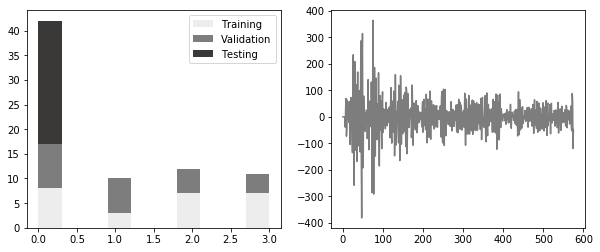

In [21]:
test.plotDataStatisticsUpdated(inputData, plot=True)

In [22]:
test.selectEstimators()

[0]


In [23]:
test.createTestParams()

C:\Users\Raja Sattiraju\Anaconda3\envs\python3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [24]:
test.params

{'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
  'max_features': ['auto', 'sqrt', 'log2']},
 'LogisticRegression': {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
  'solver': ['lbfgs', 'sag', 'newton-cg']},
 'Perceptron': {'estimator__alpha': [0.0001, 0.001, 0.01, 0.1, 1]}}

In [25]:
test.gridSearch()

Starting Grid Search for LogisticRegression
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  53 out of  63 | elapsed:    3.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:    3.4s finished


Starting Grid Search for Perceptron
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed:    1.4s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    2.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    3.2s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.2s finished


Starting Grid Search for DecisionTreeClassifier
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    1.1s remaining:    5.9s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:    2.0s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    2.9s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    3.2s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.2s finished


In [37]:
[x for x in test.gs_results['DecisionTreeClassifier'].keys() if 'param' in x and x is not 'params']

['param_criterion', 'param_max_features']

In [31]:
test.gs_results.keys()

dict_keys(['Perceptron', 'DecisionTreeClassifier', 'LogisticRegression'])

In [36]:
test.gs_results['DecisionTreeClassifier']

{'mean_fit_time': array([ 0.00066717,  0.00133634,  0.00133562,  0.00067131,  0.00100088,
         0.00100136]),
 'mean_score_time': array([ 0.00033315,  0.00066725,  0.00033402,  0.00066249,  0.00066773,  0.        ]),
 'mean_test_score': array([ 0.32,  0.2 ,  0.36,  0.2 ,  0.28,  0.28]),
 'mean_train_score': array([ 1.,  1.,  1.,  1.,  1.,  1.]),
 'param_criterion': masked_array(data = ['gini' 'gini' 'gini' 'entropy' 'entropy' 'entropy'],
              mask = [False False False False False False],
        fill_value = ?),
 'param_max_features': masked_array(data = ['auto' 'sqrt' 'log2' 'auto' 'sqrt' 'log2'],
              mask = [False False False False False False],
        fill_value = ?),
 'params': [{'criterion': 'gini', 'max_features': 'auto'},
  {'criterion': 'gini', 'max_features': 'sqrt'},
  {'criterion': 'gini', 'max_features': 'log2'},
  {'criterion': 'entropy', 'max_features': 'auto'},
  {'criterion': 'entropy', 'max_features': 'sqrt'},
  {'criterion': 'entropy', 'max_feat

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import hamming_loss

In [ ]:
def hammingScore(y_true, y_pred):
    acc_list = []
    for i in range(y_true.shape[0]):
        set_true = set( np.where(y_true[i])[0] )
        set_pred = set( np.where(y_pred[i])[0] )
        tmp_a = None
        if len(set_true) == 0 and len(set_pred) == 0:
            tmp_a = 1
        else:
            tmp_a = len(set_true.intersection(set_pred))/ float( len(set_true.union(set_pred)) )
        acc_list.append(tmp_a)
        
    return np.mean(acc_list)

In [ ]:
testmodel = LogisticRegression()
testparams = {'solver' : ['lbfgs','sag','newton-cg'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
import inspect

In [ ]:
testmodel.get_params()

In [ ]:
scoring = {'Accuracy' : 'accuracy',
           'RecallWeighted'  : 'recall_weighted',
           'HammingLoss' : make_scorer(hamming_loss,greater_is_better=False),
          }

In [ ]:
scoring.values()

In [ ]:
gs = GridSearchCV(testmodel,testparams,n_jobs=-1,verbose=5, scoring=scoring, refit='Accuracy')

In [ ]:
gs.fit(inputData.trainingData, inputData.trainingLabels.ravel())

In [ ]:
gs.cv_results_

In [ ]:
gs.cv_results_